In [ ]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sentence_transformers import SentenceTransformer, util


nltk.download('punkt')



C:\Users\verma\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\verma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment(text):
    score = analyzer.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


In [11]:
#high_risk_keywords = ["don’t want to be here", "hurt myself", "kill myself", "end it all"]
#moderate_risk_keywords = ["feel lost", "need help", "struggling", "addicted", "overwhelmed"]

#def classify_risk(text):
    #text = text.lower()
    #for phrase in high_risk_keywords:
        #if phrase in text:
            #return "High-Risk"
    #for phrase in moderate_risk_keywords:
        #if phrase in text:
            #return "Moderate Concern"
    #return "Low Concern"


In [12]:
# Define seed phrases for each risk level
risk_phrases = {
    "High-Risk": [
        "I want to die", "I don’t want to be here anymore", "I am thinking of ending it all",
        "I will hurt myself", "I want to kill myself", "life is meaningless"
    ],
    "Moderate Concern": [
        "I feel lost", "I'm struggling lately", "I need help", "I feel anxious all the time",
        "I’m so tired emotionally", "I can't cope anymore"
    ],
    "Low Concern": [
        "Mental health awareness", "Therapy has helped me", "Self-care is important",
        "I’ve been feeling stressed", "I'm trying to stay positive"
    ]
}

In [13]:
# Load model
model = SentenceTransformer("all-MiniLM-L6-v2")

C:\Users\verma\AppData\Roaming\Python\Python313\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\verma\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [14]:
df = pd.read_csv("cleaned_mental_health_tweets.csv")

In [16]:
risk_embeddings = {
    label: model.encode(phrases, convert_to_tensor=True)
    for label, phrases in risk_phrases.items()
}

# Embed post texts
post_embeddings = model.encode(df["content"].tolist(), convert_to_tensor=True)

In [17]:
# Risk scoring
def get_risk_level(post_embedding):
    scores = {}
    for level, embeds in risk_embeddings.items():
        sim = util.cos_sim(post_embedding, embeds)
        max_sim = sim.max().item()
        scores[level] = max_sim
    # Assign label with highest similarity score
    return max(scores, key=scores.get)

In [18]:
df["risk_level"] = [get_risk_level(emb) for emb in post_embeddings]

In [19]:
print(df["risk_level"].value_counts())

risk_level
Low Concern         23
Moderate Concern     9
High-Risk            8
Name: count, dtype: int64


In [20]:


df["Sentiment"] = df["content"].apply(classify_sentiment)
#df["Risk_Level"] = df["content"].apply(classify_risk)


In [21]:
df

,post_id,timestamp,content,likes,retweets,replies,risk_level,Sentiment
0,1907753011637592104,2025-04-03 11:12:16+00:00,another poor man beaten raj thackerays goons s...,0,1302,0,High-Risk,Negative
1,1907753010643804454,2025-04-03 11:12:16+00:00,mental health absolutely testing,0,666,0,Low Concern,Neutral
2,1907753009184125288,2025-04-03 11:12:16+00:00,mental health great ima strong christian lovin...,0,0,0,Low Concern,Positive
3,1907753006021439540,2025-04-03 11:12:15+00:00,cannot stress enough came 5th,0,7817,0,Low Concern,Positive
4,1907753004612153744,2025-04-03 11:12:15+00:00,meek helpless spineless response indian govt t...,0,74,0,High-Risk,Negative
5,1907753001810284898,2025-04-03 11:12:14+00:00,overwhelmed tasks ai help automate routine wor...,0,0,0,Moderate Concern,Positive
6,1907753000816333291,2025-04-03 11:12:14+00:00,cant stress enough men men women women denying...,0,0,0,Low Concern,Positive
7,1907753000782766323,2025-04-03 11:12:14+00:00,thoughts epidemic loneliness anxiety collated ...,0,19,0,Low Concern,Negative
8,1907752990280171651,2025-04-03 11:12:11+00:00,america help police officer doubt mental healt...,0,107,0,Low Concern,Positive
9,1907752989844033768,2025-04-03 11:12:11+00:00,kanye west confirms wife bianca censori left p...,0,0,0,Moderate Concern,Negative


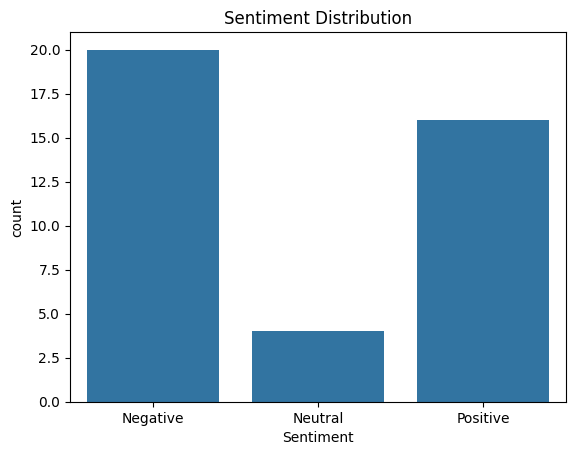

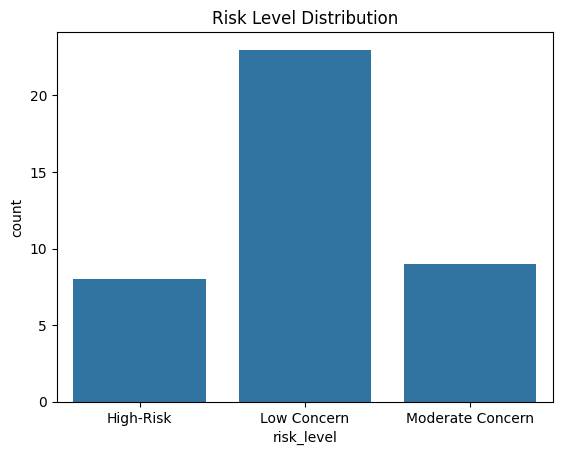

In [23]:
# Sentiment Distribution
sns.countplot(x="Sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# Risk Level Distribution
sns.countplot(x="risk_level", data=df)
plt.title("Risk Level Distribution")
plt.show()


In [24]:
df.to_csv("classified_mental_health_tweets.csv", index=False)
